# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Домашнее задание http://prntscr.com/ujddtw

## 1. Возьмите датасет Mortality and Water Hardness

https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

## 2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

## 3. Задание. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы.

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [4]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


<AxesSubplot:title={'center':'hardness distribution'}>

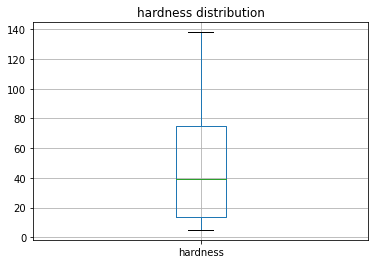

In [5]:
# Распределение значения hardness
df.hardness.plot(kind='box',
                title='hardness distribution',
                        grid=True)

Из графика видно, что верхний "ус" показателя hardness значительно больше, чем нижний.

Большинство значений лежит в пределах 14.0-75.0. Медиана немного сдвинута к нижней границе "коробки".

Выбросов нет.

<AxesSubplot:title={'center':'mortality distribution'}>

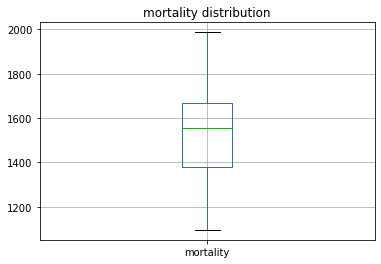

In [6]:
# Распределение значения mortality
df.mortality.plot(kind='box',
                title='mortality distribution',
                        grid=True)

Распределение показателя mortality более равномерное, верний и нижний "ус" почти одинаковы.

Большинство значений лежит в пределах 1379.0-1668.0. Медиана сдвинута к верхней границе.

Выбросов нет.


## Есть ли связь между жёсткостью воды и средней годовой смертностью?

### Точечный график mortality-hardness

<AxesSubplot:title={'center':'hardness vs mortality'}, xlabel='hardness', ylabel='mortality'>

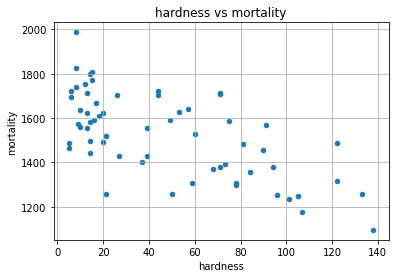

In [7]:
# Точечный график mortality-hardness
df.plot(kind='scatter', x='hardness', y='mortality',
       title='hardness vs mortality',
                        grid=True)

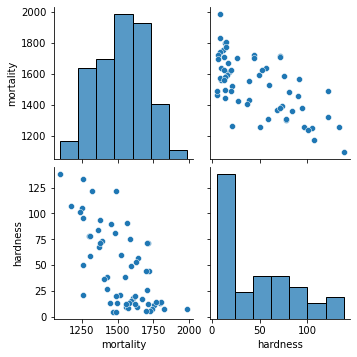

In [8]:
sns.pairplot(df[['mortality', 'hardness']])

### Коэффициенты корреляции Пирсона и Спирмена

In [9]:
# коэффициент корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [10]:
# коэффициент корреляции Спирмена
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Коэффициент корреляции Пирсона r = -0.654849.

Коэффициент корреляции Спирмена r = -0.631665.

Значения коэффициентов близки.

Знак говорит об обратной взаимосвязи между показателями.

0.4<=|r|<=0.8 - взаимосвязь средняя.

### Модель линейной регрессии

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# коэф. k
model.coef_

array([-3.13167087])

In [14]:
# коэф. b
model.intercept_

1668.9722977277095

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

### Коэффициент детерминации R2

In [16]:
model.score(X_test, y_test)

0.5046490611017092

Text(0, 0.5, 'mortality')

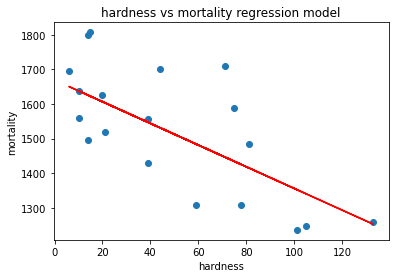

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('hardness vs mortality regression model')
plt.xlabel('hardness')
plt.ylabel('mortality')


Коэф. детерминации R2=0.5046490611017092, 0<=R2<=1, значит модель пригодна, но точность модели средняя, т.к. данных мало и во многом зависит от случайного разбиения на обучающую и тестовую выборки.
В целом, прослеживается обратная взаимосвязь между показателями жесткости воды и среднегодовой смертности. 

### График остатков 

Text(0.5, 1.0, 'график остатков')

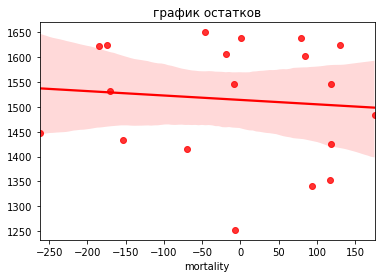

In [18]:
ax = sns.regplot (x = y_pred - y_test , y = y_pred, data = None, scatter = True, color = 'red')
ax.set_title('график остатков')

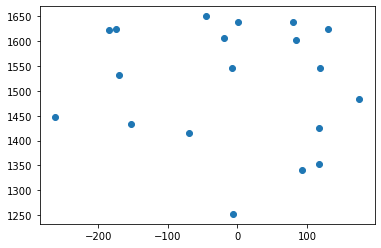

In [19]:
r = y_pred- y_test
plt.scatter(r,y_pred)

## Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

### Южный регион

In [20]:
South_df = df[df['location'] == 'South']


In [21]:
South_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [22]:
South_df.describe()

,Unnamed: 0,mortality,hardness
count,26.000000,26.000000,26.000000
mean,31.346154,1376.807692,69.769231
std,18.742342,140.269175,40.360682
min,1.000000,1096.000000,5.000000
25%,14.250000,1259.250000,40.250000
50%,33.500000,1364.000000,75.500000
75%,46.500000,1485.750000,99.750000
max,60.000000,1627.000000,138.000000


<AxesSubplot:title={'center':'hardness distribution South region'}>

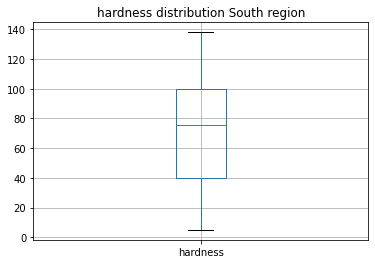

In [23]:
# Распределение значения hardness
South_df.hardness.plot(kind='box',
                title='hardness distribution South region',
                        grid=True)


#### Верхний и нижний "ус" показателя hardness почти одинаковы.

Большинство значений лежит в пределах 40.25-99.75. Медиана немного сдвинута к верхней граниче "коробки".

Выбросов нет.

<AxesSubplot:title={'center':'mortality distribution South region'}>

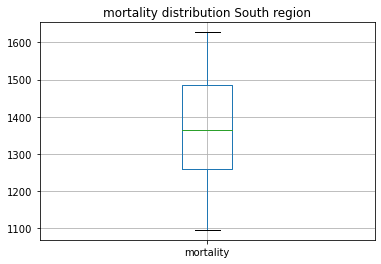

In [24]:
# Распределение значения mortality
South_df.mortality.plot(kind='box',
                title='mortality distribution South region',
                        grid=True)

Распределение показателя mortality более равномерное, верний и нижний "ус" почти одинаковы.

Большинство значений лежит в пределах 1379.0-1668.0. Медиана сдвинута к верхней границе.

Выбросов нет.


### Точечный график mortality-hardness South region

<AxesSubplot:title={'center':'hardness vs mortality South region'}, xlabel='hardness', ylabel='mortality'>

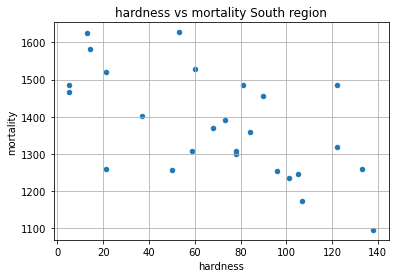

In [25]:
# Точечный график mortality-hardness
South_df.plot(kind='scatter', x='hardness', y='mortality',
       title='hardness vs mortality South region',
                        grid=True)

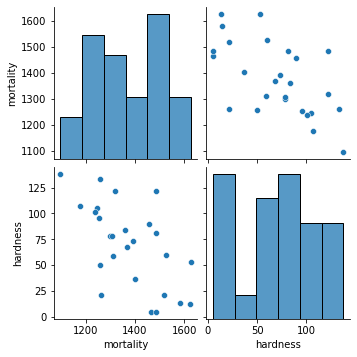

In [26]:
sns.pairplot(South_df[['mortality', 'hardness']])

### Коэффициенты корреляции Пирсона и Спирмена South region

In [27]:
# коэффициент корреляции Пирсона
South_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [28]:
# коэффициент корреляции Спирмена
South_df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Коэффициент корреляции Пирсона r = -0.602153.

Коэффициент корреляции Спирмена r = -0.595723.

Значения коэффициентов близки.

Знак говорит об обратной взаимосвязи между показателями.

0.4<=|r|<=0.8 - взаимосвязь средняя.

### Модель линейной регрессии South region

In [29]:
X = South_df[['hardness']]
y = South_df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# коэф. k
model.coef_

array([-1.53420777])

In [31]:
# коэф. b
model.intercept_

1458.3015508939286

In [32]:
y_pred = model.predict(X_test)
y_pred

array([1438.35684991, 1366.24908481, 1294.1413197 , 1426.08318776,
       1346.30438382, 1401.53586347, 1376.98853918, 1271.12820318])

### Коэффициент детерминации R2 South region

In [33]:
model.score(X_test, y_test)

0.12278533289699833

Text(0, 0.5, 'mortality')

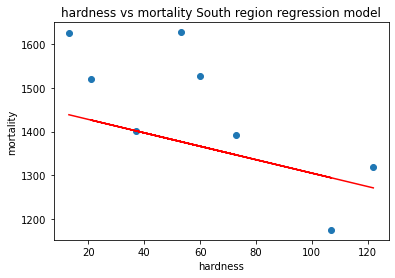

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('hardness vs mortality South region regression model')
plt.xlabel('hardness')
plt.ylabel('mortality')

Коэф. детерминации R2=0.12278533289699833, 0<=R2<=1, значит модель пригодна, но точность модели низкая, т.к. данных мало и во многом зависит от случайного разбиения на обучающую и тестовую выборки.
В целом, прослеживается обратная взаимосвязь между показателями жесткости воды и среднегодовой смертности южных регионах, но уже не так очевидно, как с данными по всем регионам.

### График остатков South region

Text(0.5, 1.0, 'график остатков')

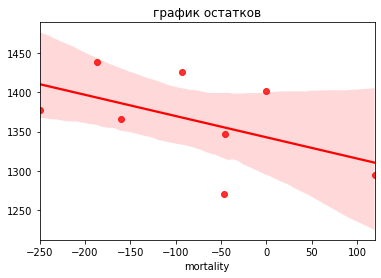

In [35]:
ax = sns.regplot (x = y_pred - y_test , y = y_pred, data = None, scatter = True, color = 'red')
ax.set_title('график остатков')

### Северный регион

In [36]:
North_df = df[df['location'] == 'North']

In [37]:
North_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [38]:
North_df.describe()

,Unnamed: 0,mortality,hardness
count,35.000000,35.000000,35.000000
mean,30.742857,1633.600000,30.400000
std,17.254740,136.936911,26.134494
min,2.000000,1378.000000,6.000000
25%,17.500000,1557.500000,12.500000
50%,30.000000,1637.000000,17.000000
75%,45.500000,1718.000000,44.000000
max,61.000000,1987.000000,94.000000


<AxesSubplot:title={'center':'hardness distribution North region'}>

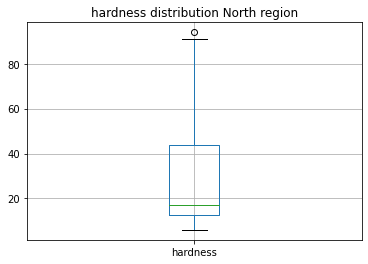

In [39]:
# Распределение значения hardness
North_df.hardness.plot(kind='box',
                title='hardness distribution North region',
                        grid=True)


#### Верхний и нижний "ус" показателя hardness почти одинаковы.

Большинство значений лежит в пределах 12.5-44.0. Медиана немного сдвинута к нижней границе "коробки".

Есть выброс в верхней границе.

<AxesSubplot:title={'center':'mortality distribution North region'}>

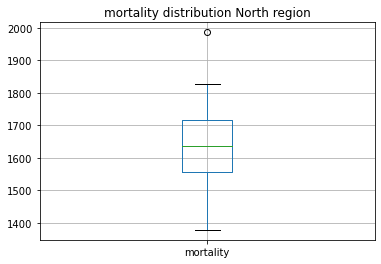

In [40]:
# Распределение значения mortality
North_df.mortality.plot(kind='box',
                title='mortality distribution North region',
                        grid=True)

Распределение показателя mortality более равномерное, верний и нижний "ус" почти одинаковы.

Большинство значений лежит в пределах 1557.5-1718.0. Медиана посередине.

Есть выброс в верхней границе.


### Точечный график mortality-hardness North region

<AxesSubplot:title={'center':'hardness vs mortality North region'}, xlabel='hardness', ylabel='mortality'>

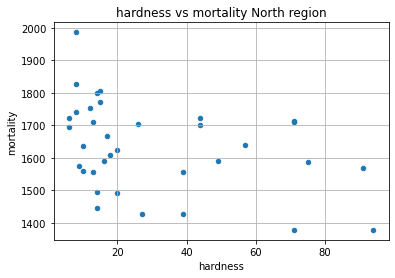

In [41]:
# Точечный график mortality-hardness
North_df.plot(kind='scatter', x='hardness', y='mortality',
       title='hardness vs mortality North region',
                        grid=True)

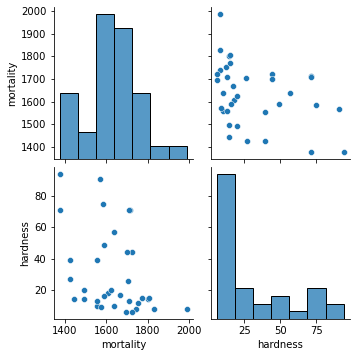

In [42]:
sns.pairplot(North_df[['mortality', 'hardness']])

### Коэффициенты корреляции Пирсона и Спирмена North region

In [43]:
# коэффициент корреляции Пирсона
North_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [44]:
# коэффициент корреляции Спирмена
North_df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Коэффициент корреляции Пирсона r = -0.602153.

Коэффициент корреляции Спирмена r = -0.595723.

Значения коэффициентов близки.

Знак говорит об обратной взаимосвязи между показателями.

0.4<=|r|<=0.8 - взаимосвязь средняя.

### Модель линейной регрессии North region

In [45]:
X = North_df[['hardness']]
y = North_df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# коэф. k
model.coef_

array([-1.97686226])

In [47]:
# коэф. b
model.intercept_

1688.150229031281

In [48]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

### Коэффициент детерминации R2 North region

In [49]:
model.score(X_test, y_test)

0.018885304285745863

Text(0, 0.5, 'mortality')

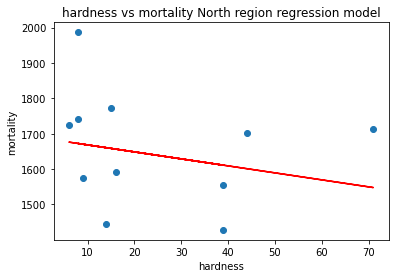

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('hardness vs mortality North region regression model')
plt.xlabel('hardness')
plt.ylabel('mortality')

Коэф. детерминации R2=0.018885304285745863, 0<=R2<=1, значит модель пригодна, но точность модели низкая, т.к. данных мало и во многом зависит от случайного разбиения на обучающую и тестовую выборки.
В целом, прослеживается обратная взаимосвязь между показателями жесткости воды и среднегодовой смертности южных регионах, но уже не так очевидно, как с данными по всем регионам.

### График остатков North region

Text(0.5, 1.0, 'график остатков')

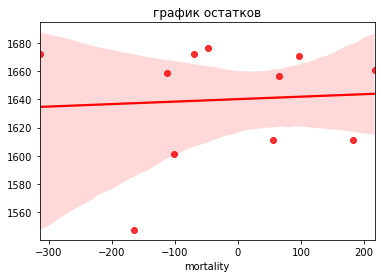

In [51]:
ax = sns.regplot (x = y_pred - y_test , y = y_pred, data = None, scatter = True, color = 'red')
ax.set_title('график остатков')

## Заключение

В целом, взаимосвязь между hardness и mortality отдельно по регионам South и North прослеживается так же, как и в общем отчете, но отдельно по регионам взаимосвязь менее выражена. Точность регрессионной модели очень низкая, т.к. небольшое количество данных. Поэтому на точность модели сильное влияние оказывает случайное разбиение данных на обучающую и тестовую выборки.